# Вступ в ЕМПІ part 1

В датасеті записана інформація про стан атмосфери в місті Єна(Німеччина).

Дані взяті з https://www.kaggle.com/pankrzysiu/weather-archive-jena

Columns

1.   Date Time
2.p (mbar)atmospheric pressure
3.T (degC)temperature
4.Tpot (K)potential temperature
5.Tdew (degC)dew point temperature
6.rh (%)relative humidity
7.VPmax (mbar)saturation water vapor pressure
8.VPact (mbar)actual water vapor pressure
9.VPdef (mbar)water vapor pressure deficit
10.sh (g/kg)specific humidity
11.H2O (mmol/mol)water vapor concentration
12.rho (g/m**3)air density
13.wv (m/s)wind velocity
14.max. wv (m/s)maximum 
15.wd_(deg) wind velocity





In [0]:
# підключимо бібліотеку pandas для обробки даних (вона вже встановлена в Colab)
import pandas as pd

# зазначимо url звідки ми візьмемо дані
url = "https://raw.githubusercontent.com/Aarrtteemm123/dataset-weather/master/jena_climate_2009_2016.csv"

# створимо pandas Dataframe з csv-файлу, який ми отримаємо по вищезазначеному url
# Dataframe надасть нам необхідні можливості для обробки даних
df = pd.read_csv(url)

# відобразимо перші 5 записів у датафреймі (достатньо, щоб побачити структуру записів у ньому)
df.head()

,Date_Time,p_(mbar),T_(degC),Tpot_(K),Tdew_(degC),rh (%),Vpmax_(mbar),Vpact_(mbar),Vpdef_(mbar),sh_(g/kg),H2OC_(mmol/mol),rho_(g/m**3),wv_(m/s),max._wv_(m/s),wd_(deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [0]:
# резюме колонки, що містить температуру повітря
df['T_(degC)'].describe()

count    100000.000000
mean        283.038151
std           8.679185
min         250.600000
25%         277.250000
50%         283.360000
75%         289.060000
max         309.160000
Name: T_(degC), dtype: float64

In [0]:
# мода колонки, що містить температуру повітря
df['T_(degC)'].mode()

0    2.87
dtype: float64

In [0]:
# медіана колонки, що містить температуру повітря
df['T_(degC)'].median()

9.18

In [0]:
# середнє арифметичне температури повітря
df['T_(degC)'].mean()

8.864684546845456

In [0]:
from scipy.stats.mstats import gmean

# СГео колонок [1-атмосферного тиску, 2-температури повітря) 
gmean(df.iloc[:,1:2], axis=0)

array([987.52621821])

In [0]:
from scipy.stats.mstats import hmean

# СГео колонок [1-атмосферного тиску, 2-температури повітря)
hmean(df.iloc[:,1:2], axis=0)

array([987.4896709])

In [0]:
# варіаціний ряд
import numpy as np
df['T_(degC)'].quantile(np.linspace(.1, 1, 9, 0))
df.dropna().quantile([0.0, .25, .5, .75, .99])

,p_(mbar),T_(degC),Tpot_(K),Tdew_(degC),rh (%),Vpmax_(mbar),Vpact_(mbar),Vpdef_(mbar),sh_(g/kg),H2OC_(mmol/mol),rho_(g/m**3),wv_(m/s),max._wv_(m/s),wd_(deg)
0.00,944.58,-23.01,250.60,-25.0100,21.65,0.95,0.79,0.0000,0.50,0.8000,1105.7800,0.00,0.0000,0.000
0.25,982.90,2.92,277.25,-0.0600,65.89,7.54,6.08,0.7800,3.85,6.1700,1189.4900,1.02,1.8200,122.375
0.50,988.72,9.18,283.36,5.1200,79.90,11.63,8.80,2.0100,5.57,8.9200,1212.7800,1.81,3.0400,197.000
0.75,993.40,14.99,289.06,9.7300,90.00,17.07,12.07,5.0200,7.62,12.1900,1240.2000,2.88,4.7300,235.400
0.99,1003.48,27.64,301.89,16.8901,98.80,37.07,19.28,21.8101,12.25,19.5401,1324.5902,7.32,10.9502,351.900


# Відповіді на запитання до теми "Вступ в ЕМПІ part 1"



> 1.Методи дослідження світу бувають: теоретичні та емпіричні. До них      відносять:
1.   Спостереження — цілеспрямоване сприйняття явищ.
2.Опис — фіксація засобами мови відомостей про об'єкти.
3.Вимірювання — порівняння об'єктів по яких-небудь загальних властивостях.
4.Експеримент — спостереження в спеціально створених контрольованих умовах.
5.Порівняння — одночасне співвідносне дослідження і оцінка загальних для 
 об'єктів властивостей та ознак.


 

---

>  2.Задача емпіричних методів
полягає в наступному: підтвердити або спростувати гіпотези на основі аналізу статистичних показників.



---


> 3.Статистичним показником називають узагальнену числову характеристику будь-якого масового явища в поєднанні з його якісною визначеністю в конкретних умовах місця і часу. Прикладом статистичного показника є кількість населення країни на початок року, питома вага міського і сільського населення, урожайність сільськогосподарських культур, площа ріллі, собівартість продукції тощо.



---



>  4.Закон великих чисел: закономірність масового явища виявляється лише при досить великій кількості спостережень, коли відбувається взаємне погашення впливу випадкових причин, які мають місце в окремих випадках.


---


>  5.Невірна класифікація та як наслідок нерепрезентативна вибірка


---


>  6.Це така оброка при якій дані розділяються на частини та з них заповнюється таблиця в якій кожна колонка має мати якесь значення,дані зводяться до спільних характеристик.
Емпіричні дані, які ми отримуємо шляхом вимірювань або за допомогою імітаційного моделювання — мають пройти первинну обробку.
Вона включає:
1.   табуляцію
2.   впорядкування у варіаційні послідовності (або ряди)
3.   групування (при побудові інтервального варіаційного ряду)
4.   побудову статистичного розподілу
5.   обчислення окремих статистичних параметрів


---


> 7.Розрізняють просту і перехресну табуляцію.
Проста табуляція
Це підрахунок кількості подій, які потрапляють в певну категорію, що базується на одній змінній. Простій табуляції піддаються відповіді, отримані як на основні, так і на класифікаційні питання.

> Перехресна табуляція
Це підрахунок кількості подій, які потрапляють в кожну з декількох категорій, що базуються на двох або більше змінних, які розглядаються одночасно.

> У маркетингових дослідженнях найбільш часто використовують подвійну і потрійну перехресну табуляцію. Використання перехресної табуляції, більшої ніж потрійна, призводить до різкого ускладнення інтерпретації результатів.

> Варто зауважити, що дослідник повинен обмежити кількість перехресних табуляцій, виходячи з цілей дослідження і свого досвіду.

> Табуляція і аналіз даних отриманих таблиць є найважливішим етапом аналізу первинної інформації. На цій стадії виявляються основні закономірності і висуваються нові гіпотези.

---

> 8.Однією з найважливіших складових наукових досліджень є експеримент. Термін "експеримент" походить від лат. ехреrіmetum — спроба, дослід і вживається для позначення низки споріднених понять: дослід, цілеспрямоване спостереження, відтворення об'єкта дослідження, організація особливих умов його існування, перевірка передбачень.

> Отже, поняття "експеримент" означає проведення у визначених умовах серії дослідів для спостереження за станом об'єкта дослідження, які дозволяють стежити за його змінами і відтворювати їх кожний раз під час повторення дослідів.

> Основною метою експериментів є визначення властивостей об'єктів дослідження та перевірка справедливості гіпотез і на цій основі широке вивчення теми наукового дослідження.

> Види експериментів: активний,пасивний,багатофакторним.

# Вступ в ЕМПІ part 2

In [0]:
# рандомна вибірка 10 записів
df.sample(10)

,Date_Time,p_(mbar),T_(degC),Tpot_(K),Tdew_(degC),rh (%),Vpmax_(mbar),Vpact_(mbar),Vpdef_(mbar),sh_(g/kg),H2OC_(mmol/mol),rho_(g/m**3),wv_(m/s),max._wv_(m/s),wd_(deg);;;;;;;;;
45759,14.11.2009 19:00:00,984.59,10.41,284.83,5.83,73.20,12.64,9.25,3.39,5.86,9.39,1205.26,2.37,3.52,205.70;;;;;;;;;
90988,23.09.2010 21:10:00,982.96,14.67,289.25,11.23,79.80,16.72,13.34,3.38,8.49,13.57,1183.57,1.19,1.72,211.10;;;;;;;;;
37194,16.09.2009 07:10:00,989.32,13.07,287.11,12.82,98.40,15.07,14.83,0.24,9.37,14.99,1197.24,3.62,5.38,21.22;;;;;;;;;
60625,26.02.2010 00:40:00,968.70,6.11,281.82,1.24,70.90,9.43,6.68,2.74,4.30,6.90,1205.22,1.66,2.32,163.90;;;;;;;;;
98524,15.11.2010 05:10:00,982.66,12.09,286.68,6.73,69.65,14.13,9.84,4.29,6.25,10.01,1195.53,0.67,1.52,267.50;;;;;;;;;
74281,31.05.2010 20:40:00,985.18,9.48,283.85,8.49,93.50,11.87,11.10,0.77,7.04,11.27,1209.09,1.94,6.61,299.40;;;;;;;;;
99128,19.11.2010 09:50:00,989.52,4.12,278.11,2.86,91.50,8.21,7.51,0.70,4.73,7.59,1239.63,1.67,2.60,160.50;;;;;;;;;
75121,06.06.2010 16:40:00,983.18,27.10,301.72,14.39,45.70,35.92,16.41,19.50,10.45,16.70,1133.48,3.34,5.44,46.21;;;;;;;;;
20880,26.05.2009 00:10:00,987.39,14.94,289.15,10.95,77.00,17.01,13.10,3.91,8.29,13.27,1187.93,0.78,1.25,195.60;;;;;;;;;
73851,28.05.2010 21:00:00,989.71,13.15,287.16,8.10,71.40,15.15,10.81,4.33,6.82,10.93,1199.23,2.44,2.84,250.00;;;;;;;;;


In [0]:
# stratified sample
df.groupby('p_(mbar)', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))

,Date_Time,p_(mbar),T_(degC),Tpot_(K),Tdew_(degC),rh (%),Vpmax_(mbar),Vpact_(mbar),Vpdef_(mbar),sh_(g/kg),H2OC_(mmol/mol),rho_(g/m**3),wv_(m/s),max._wv_(m/s),wd_(deg);;;;;;;;;
3271,23.01.2009 17:20:00,944.58,4.49,282.22,1.77,82.4,8.42,6.94,1.48,4.58,7.35,1181.84,7.61,11.63,186.20;;;;;;;;;
3272,23.01.2009 17:30:00,944.64,4.63,282.35,1.80,81.8,8.51,6.96,1.55,4.59,7.36,1181.33,7.68,10.75,182.40;;;;;;;;;
3270,23.01.2009 17:10:00,944.64,4.24,281.96,1.66,83.2,8.28,6.89,1.39,4.55,7.29,1183.00,7.30,10.00,184.40;;;;;;;;;
3273,23.01.2009 17:40:00,944.80,4.75,282.46,1.83,81.3,8.58,6.97,1.60,4.60,7.38,1181.02,7.67,10.63,179.10;;;;;;;;;
3269,23.01.2009 17:00:00,944.88,3.64,281.32,1.33,84.8,7.93,6.73,1.21,4.44,7.12,1185.97,6.22,8.88,183.00;;;;;;;;;
3274,23.01.2009 17:50:00,944.95,4.71,282.41,1.81,81.4,8.56,6.96,1.59,4.60,7.37,1181.35,6.60,9.75,180.60;;;;;;;;;
3275,23.01.2009 18:00:00,944.99,4.79,282.48,1.85,81.2,8.60,6.98,1.62,4.61,7.39,1181.08,6.46,9.75,181.40;;;;;;;;;
3268,23.01.2009 16:50:00,945.03,3.23,280.89,0.93,84.8,7.70,6.53,1.17,4.31,6.91,1188.01,5.14,7.25,172.50;;;;;;;;;
3276,23.01.2009 18:10:00,945.04,4.93,282.62,1.93,80.9,8.68,7.02,1.66,4.64,7.43,1180.54,7.00,10.63,183.00;;;;;;;;;
3267,23.01.2009 16:40:00,945.06,2.96,280.62,0.76,85.4,7.56,6.46,1.10,4.26,6.83,1189.24,4.92,6.75,181.50;;;;;;;;;


In [0]:
# cluster sample
df2 = df.groupby('Date_Time', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))
df2.sample(100)

,Date_Time,p_(mbar),T_(degC),Tpot_(K),Tdew_(degC),rh (%),Vpmax_(mbar),Vpact_(mbar),Vpdef_(mbar),sh_(g/kg),H2OC_(mmol/mol),rho_(g/m**3),wv_(m/s),max._wv_(m/s)
09.05.2009 09:00:00,995.43,10.99,284.52,4.70,65.07,13.13,8.55,4.59,5.36,8.59,1216.41,1.48,3.00,115.30
02.11.2009 04:20:00,976.68,4.30,279.34,2.75,89.60,8.31,7.45,0.86,4.76,7.63,1222.71,4.01,5.77,164.90
14.08.2010 02:10:00,990.34,13.90,287.86,13.18,95.40,15.90,15.17,0.73,9.59,15.32,1194.86,0.88,1.76,154.20
10.02.2009 05:10:00,966.29,0.20,276.06,-0.03,98.30,6.20,6.09,0.11,3.93,6.31,1228.46,3.54,4.38,186.90
13.10.2009 08:50:00,996.30,5.09,278.55,3.33,88.30,8.79,7.76,1.03,4.86,7.79,1243.65,1.48,2.96,259.20
08.07.2010 04:20:00,995.18,12.49,286.04,10.34,86.70,14.50,12.58,1.93,7.90,12.64,1207.87,1.44,1.92,195.40
13.06.2010 02:10:00,988.43,11.33,285.44,8.91,85.00,13.43,11.42,2.02,7.22,11.55,1205.06,3.09,4.24,238.80
12.12.2009 22:40:00,996.58,-1.25,272.18,-1.66,97.00,5.57,5.41,0.17,3.38,5.43,1274.15,0.80,1.40,16.41
27.01.2010 04:30:00,1008.35,-17.87,254.68,-19.61,86.10,1.49,1.28,0.21,0.79,1.27,1375.30,1.08,1.92,200.50
14.11.2010 00:20:00,973.99,13.90,289.23,8.15,68.23,15.90,10.85,5.05,6.96,11.14,1177.00,7.09,10.69,210.50


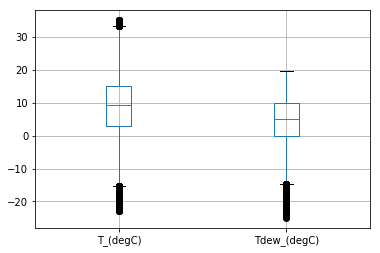

In [0]:
# квартилі розподілу температури повітря та температури точки роси
df.boxplot(column=['T_(degC)', 'Tdew_(degC)'])

In [0]:
# розмах швидкості вітру
R = df['wv_(m/s)'].max() - df['wv_(m/s)'].min()
R

14.63

In [0]:
# дисперсія
var = df.var()
var

p_(mbar)             71.504028
T_(degC)             75.257515
Tpot_(K)             75.328112
Tdew_(degC)          49.117310
rh (%)              266.073892
Vpmax_(mbar)         57.145466
Vpact_(mbar)         16.887249
Vpdef_(mbar)         22.636158
sh_(g/kg)             6.784138
H2OC_(mmol/mol)      17.264158
rho_(g/m**3)       1611.439982
wv_(m/s)              2.376636
max._wv_(m/s)         5.300981
dtype: float64

In [0]:
# standard deviation
std = df.std()
std

p_(mbar)            8.456005
T_(degC)            8.675109
Tpot_(K)            8.679177
Tdew_(degC)         7.008374
rh (%)             16.311772
Vpmax_(mbar)        7.559462
Vpact_(mbar)        4.109410
Vpdef_(mbar)        4.757747
sh_(g/kg)           2.604638
H2OC_(mmol/mol)     4.155016
rho_(g/m**3)       40.142745
wv_(m/s)            1.541634
max._wv_(m/s)       2.302386
dtype: float64

# Відповіді на запитання до теми "Вступ в ЕМПІ part 2"


> 1.Вибірка - частина нашої ГС (потрібна для того, щоб провести експерименти лише над певною частиною записів. І потім по можливості узагальнити їх на всю ГС). Вкрай важливо досягти того, щоб вибірка була репрезентативною. Тобто: щоб вибірка була моделлю ГС і відображала її властивості.


> Репрезентативність (від фр. representant — представник) — здатність вибіркової сукупності відтворювати основні характеристики генеральної сукупності. Репрезентативність досягається за рахунок правильного формування вибірки, яка за принциповими для дослідження параметрами має відтворювати загальний об'єкт дослідження.


---


> 2.Ключова ідея стратифікованої вибірки: розбиття ГС на декілька відмінних одна від одної "страт" - груп і застосувати метод ПВВ.



> Ключова ідея групової вибірки: як і у випадку із стратифікованою вибіркою, розбиваємо ГС на декілька груп (кластерів). Проте в даному випадку робимо це так, щоб усі кластери були досить схожими між собою. Вибираємо для розгляду лише декілька кластерів і застосовуємо до них метод ПВВ.

> Зазвичай формування такої вибірки корисно з огляду на економію часу та інших ресурсів.
---
> 3.Розмах (range) - різниця між максимальним та мінімальним значенням. 

> Критичний недолік розмаху полягає в тому, що він використовує лише 2 крайніх значення.
І будь-які зміни цих значень будуть вкрай відчутно відображатись на результаті.

---

> 4.Дисперсія - середній квадрат відхилень індивідуальних значень показника від його середнього значення а  std (standard deviation) - реальний показник середнього квадратичного відхилення - наскільки в середньому кожен елемент нашої вибірки відхиляється від середнього значення по даній вибірці.В цьому і різниця між дисперсією та середнім квадратичним відхиленням.
---
> 5.Квартилі - 3 точки (значення показника), які ділять впорядковану множину даних на чотири рівних частини. Відповідно: в кінці перших 25% множини знаходиться до 1-а точка, 50% - 2-га точка (медіана), 75% - 3-тя точка.

> Їх можна чудово розгледіти, побудувавши графік box-plot
---
> 6.Міжквартильний розмах - різниця між верхньою межею і нижньою межею. Чим більше значення має цей розмах - тим більша варіативність показника.
---
> 7.В середу 2 жовтня,в неї входять код та відповіді на питання :-).




# Вступ в ЕМПІ part 3

In [0]:
# z-стандартизація
cols = ['T_(degC)', 'Tdew_(degC)']
for col in cols:
    col_zscore = col + '_zsc'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df.head()
# df.tail()

,Date_Time,p_(mbar),T_(degC),Tpot_(K),Tdew_(degC),rh (%),Vpmax_(mbar),Vpact_(mbar),Vpdef_(mbar),sh_(g/kg),H2OC_(mmol/mol),rho_(g/m**3),wv_(m/s),max._wv_(m/s),wd_(deg);;;;;;;;;,T_(degC)_zsc,Tdew_(degC)_zsc
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30;;;;;;;;;,-1.946347,-1.910945
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10;;;;;;;;;,-1.991303,-1.965167
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60;;;;;;;;;,-2.002830,-1.969447
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00;;;;;;;;;,-1.979776,-1.935202
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30;;;;;;;;;,-1.975165,-1.930922


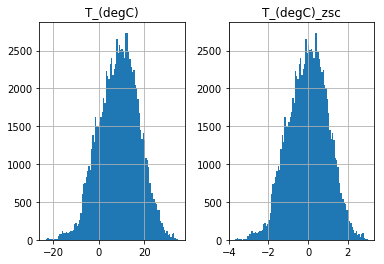

In [0]:
# графіки нормального розподілу
hist = df.hist(column=['T_(degC)', 'T_(degC)_zsc'], bins=100) 

bit.ly/dst_calc

76% спостережень за температурою показують її значення менші за 15 градусів (mean = 9, std = 8.7) 
84% спостережень за температурою показують її значення більші за 0 градусів (mean = 9, std = 8.7)
28% спостережень за температурою показують її значення в межіх від -5 до 5 градусів (mean = 9, std = 8.7)

In [0]:
# доверительный интервал 95% i 99%
x = 100000
sd = 16.311772
n = 1000
se = sd * x / pow(n, 0.5)
print("95 %")
print("["+str(x-se)+" ; "+str(x+se)+"]")
print("99 %")
print("["+str(x-se*1.96)+" ; "+str(x+se*1.96)+"]")

95 %
[48417.64780663991 ; 151582.3521933601]
99 %
[-1101.4102989857784 ; 201101.41029898578]


# Відповіді на запитання до теми "Вступ в ЕМПІ part 3"

> 1.Нормальний розподіл (розподіл Ґауса) — розподіл ймовірностей випадкової величини, що характеризується густиною ймовірності.Центральна гранична теорема стверджує, що нормальний розподіл виникає тоді, коли дана випадкова величина являє собою суму великого числа незалежних випадкових величин, кожна з яких відіграє незначну роль в утворенні всієї суми. Наприклад, відстань від влучення снаряду гармати до цілі при великій кількості пострілів характеризується саме нормальним розподілом.


---


> 2.z-стандартизація(нормалізація даних) - перетворення отриманих даних, у стандартну Z-шкалу (Z-scores) із такими характеристиками:
середнє значення ( Mz ) відтепер буде = 0;
дисперсія і стандартне відхилення ( Dz ) = 1.
Вимірюється в ум.од.

---

> 3.Щоб можна було візуально сприймати дані

---

> 4.Показує скільки відсотків спостережень лежать в певній області
*   Mx±σ≈68 % спостережень;
*   Mx±2σ≈95% спостережень;
*   Mx±3σ≈100% спостережень;

---

> 5.Центральна гранична теорема — теорема теорії ймовірностей про збіжність розподілу суми незалежних однаково розподілених випадкових величин до нормального розподілу. Ця теорема підкреслює особливість нормального розподілу в теорії ймовірностей.
Показує як розташовуються дані вибірки.

---

> 6.Це інтервал, у межах якого з заданою довірчою імовірністю можна чекати значення оцінюваної (шуканої) випадкової величини. Застосовується для повнішої оцінки точності в порівнянні з точковою оцінкою.

---

> 7.На μ±1.96σ 99%